# Mandlebrot set
This notebook details code or generation and zooming of Mandlebrot sets.

## Establish the problem
Take a complex number $Z = a + ib$, square it and add the original number to it. Repeating this can have two results:
- The series blows up to infinity (diverges).
- Stays bounded to the finite numbers.

$Z_{N+1} = Z^2 + c$

The Mandlebrot set is the set of values of c that stay bounded when starting at $Z_0 = 0$.

For the purposes of the computer we can treat complex number $Z=a + ib$ as cartesian coordinates $(x,y)$ with $x=a$ and $y=b$.

To test this, we calculate iterations of the various values of c. If they have not diverged after a large number of iterations (precision: 500 steps) then they are left blank (black).

In [1]:
from math import sqrt
from mandlebrot import generate_mandelbrot
import time

In [2]:
start = time.time()
width = 1000
image = generate_mandelbrot(width=width, precision=200, colour_rule="powerColor", zoom=30.0, offset=0.72)[0]

750,000 / 750,000, 100.0%
Generation completed successfully: 750,000 pixels


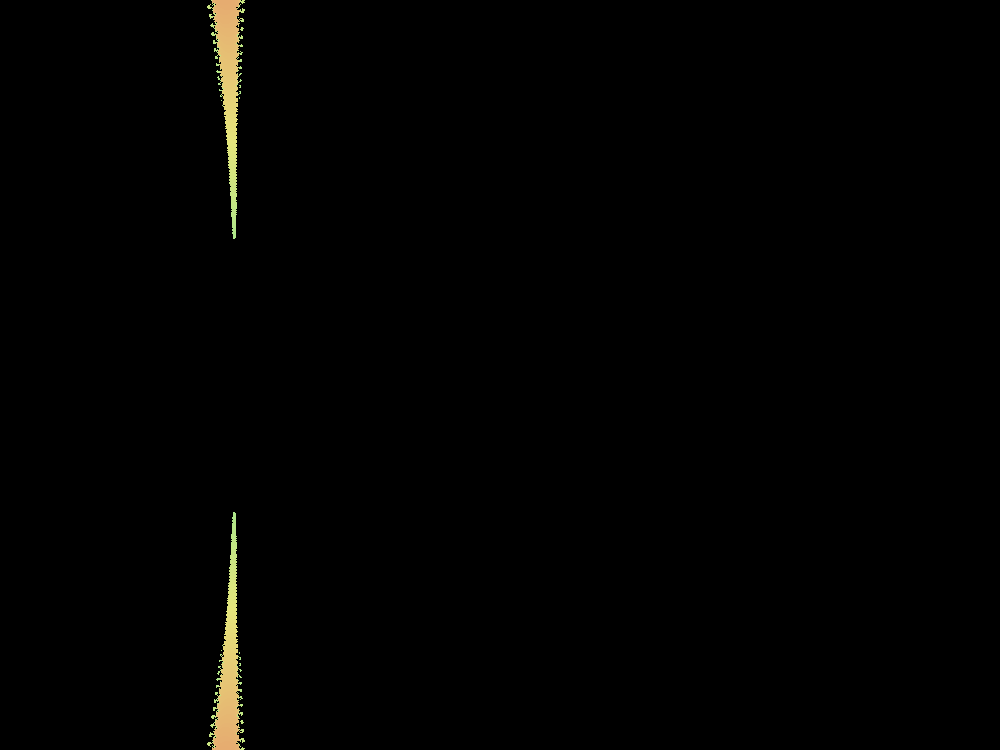

In [3]:
image

In [4]:
height = height = round(width / (4 / 3))
total_time = time.time() - start

hours, rem = divmod(total_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f'Total time taken: {int(hours)}h {int(minutes)}m {seconds:.2f}s')

rate = (width * height) / total_time

print(f'Average rate: {rate:.2f} pixels/s')

Total time taken: 0h 0m 10.61s
Average rate: 70695.41 pixels/s


In [5]:
aim_time = 2 * 60 * 60 
aim_pixels = rate * aim_time
print(f'{aim_pixels:,}')

509,006,917.1749247


In [6]:
# A = 3/4 * x**2

x_aim = sqrt((4/3) * aim_pixels)
x_aim

26051.408590833744

In [7]:
# TODO: write the .py file into a callable function.
# Params:
# - image resolution/size
# - aspect ratio
# - colour rules
# - xRange

In [8]:
# TODO: Use parallel programming to accelerate/ parallelize code.
# Also create time complexity documentation - operates in O(n^2) where n is the width of the image 

In [9]:
# TODO: Create a log or txt file for image/ runs with parameter info and runtime information.